# Creating stacked plots

## Import packages

In [1]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean
from matplotlib import colors as mcolors

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *


# OSI SAF sea ice drift
from LIB_OSI_SAF import grab_projinfo_OSISAF, grab_OSISAF_drift

# NSIDC sea ice drift
from LIB_PPdrift_NSIDC0116 import grab_projinfo_PPdrift

# ERA5
# from LIB_access_ERA5 import grab_ERA5

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

# math
import math

In [96]:
#choose the year

year = 2019

#read in the data files
df_hourly_wind = pd.read_csv(f"/Users/reu/Box/Data/{year}wind_hourly.csv")
df_weekly_drift = pd.read_csv('/Users/reu/Box/Data/2024drift_weekly.csv')
df_daily_size = pd.read_csv(f"/Users/reu/Box/Data/{year}SIC.csv")
df_daily_wind = pd.read_csv(f"/Users/reu/Box/Data/{year}wind_daily.csv")
df_hourly_upwelling = pd.read_csv(f'/Users/reu/Box/Data/{year}upwelling_hourly.csv')

if year == 2024:
    df_osisaf_drift = pd.read_csv(f'/Users/reu/Box/Data/{2024}OSISAF_drift.csv')
    drift_ratio = df_osisaf_drift.osisaf_uv_cm_s * .01 / df_daily_wind.uv_wind
else:
    df_daily_drift = pd.read_csv(f'/Users/reu/Box/Data/{year}drift_daily.csv')
    drift_ratio = df_daily_drift.daily_uv_cm_s * .01 / df_daily_wind.uv_wind

#converting the times to the correct format
time_daily = pd.to_datetime(df_daily_size.time)
time_weekly = pd.to_datetime(df_weekly_drift.time)
time_hourly = pd.to_datetime(df_hourly_wind.time)
time_daily2 = pd.to_datetime(df_daily_wind.time)

print(len(df_hourly_wind))
print(len(df_daily_size))
print(len(df_daily_wind))
print(len(df_daily_drift))

print(time_daily[0].strftime("%d-%b-%Y"))
print(time_daily[len(time_daily) - 1])
print({time_daily[len(time_daily) - 1].strftime("%d-%b-%Y")})

1488
62
62
62
01-Dec-2018
2019-01-31 00:00:00
{'31-Jan-2019'}


/var/folders/1y/8_442fb923bb526xtrg6y2p80000gr/T/ipykernel_5813/4233147390.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_hourly = pd.to_datetime(df_hourly_wind.time)
/var/folders/1y/8_442fb923bb526xtrg6y2p80000gr/T/ipykernel_5813/4233147390.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_daily2 = pd.to_datetime(df_daily_wind.time)


In [12]:
drift_ratio = df_daily_drift.daily_uv_cm_s * .01 / df_daily_wind.uv_wind

## comparing extents/areas over years

In [61]:
# fig, ax = plt.subplots(figsize = (15,5))

# ax.plot(time_daily, df_daily_size.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
# ax.plot(time_daily, df_daily_size.Open_water_area_km2, 'tab:pink', label = 'open water extent (km^2)')
# ax.set_title('Daily polynya extent and area')
# ax.legend()
# ax.set_ylim(0,40000)

In [ ]:
#read in the data files
df_daily_size_2004 = pd.read_csv("/Users/reu/Box/Data/2004SIC.csv")
df_daily_size_2011 = pd.read_csv("/Users/reu/Box/Data/2011SIC.csv")
df_daily_size_2014 = pd.read_csv("/Users/reu/Box/Data/2014SIC.csv")
df_daily_size_2018 = pd.read_csv("/Users/reu/Box/Data/2018SIC.csv")
df_daily_size_2024 = pd.read_csv("/Users/reu/Box/Data/2024SIC.csv")

#converting the times to the correct format
time_daily_2004 = pd.to_datetime(df_daily_size_2004.time)
time_daily_2011 = pd.to_datetime(df_daily_size_2011.time)
time_daily_2014 = pd.to_datetime(df_daily_size_2014.time)
time_daily_2018 = pd.to_datetime(df_daily_size_2018.time)
time_daily_2024 = pd.to_datetime(df_daily_size_2024.time)

#plotting stacked plots
fig, ax = plt.subplots(5, 1, figsize = (14,10))

labeldata = ("km2", "km2", "km2", "km2", "km2")

for i, (unit) in enumerate(labeldata):
    ax[i].set_ylabel(unit)
plt.tight_layout()
fig.subplots_adjust(top=.9)

ax[0].plot(time_daily_2004, df_daily_size_2004.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
ax[0].set_title('Daily polynya extent 2004')
ax[0].plot(time_daily_2004, df_daily_size_2004.Open_water_area_km2, 'tab:blue', label = 'open water area (km^2)')
ax[0].set_title('Daily polynya area+extent 2004')
ax[0].set_ylim(0, 40000)

ax[1].plot(time_daily_2011, df_daily_size_2011.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
ax[1].set_title('Daily polynya extent 2011')
ax[1].plot(time_daily_2011, df_daily_size_2011.Open_water_area_km2, 'tab:blue', label = 'open water area (km^2)')
ax[1].set_title('Daily polynya area+extent 2011')
ax[1].set_ylim(0, 40000)

ax[2].plot(time_daily_2014, df_daily_size_2014.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
ax[2].set_title('Daily polynya extent 2014')
ax[2].plot(time_daily_2014, df_daily_size_2014.Open_water_area_km2, 'tab:blue', label = 'open water area (km^2)')
ax[2].set_title('Daily polynya area+extent 2014')
ax[2].set_ylim(0, 40000)

ax[3].plot(time_daily_2018, df_daily_size_2018.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
ax[3].set_title('Daily polynya extent 2018')
ax[3].plot(time_daily_2018, df_daily_size_2018.Open_water_area_km2, 'tab:blue', label = 'open water area (km^2)')
ax[3].set_title('Daily polynya area+extent 2018')
ax[3].set_ylim(0, 40000)

ax[4].plot(time_daily_2024, df_daily_size_2024.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
ax[4].set_title('Daily polynya extent 2024')
ax[4].plot(time_daily_2024, df_daily_size_2024.Open_water_area_km2, 'tab:blue', label = 'open water area (km^2)')
ax[4].set_title('Daily polynya area+extent 2024')
ax[4].set_ylim(0, 40000)

ax[0].legend()

# for ax in ax.flat:
#     ax.label_outer()

# plt.xticks(rotation=30)
# # plt.xticks(time_daily)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))

# plt.suptitle(f'Stacked plots from {time_daily[0].strftime("%d-%b-%Y")} to {time_daily[len(time_daily) - 1].strftime("%d-%b-%Y")} over polynya', fontsize=16)
#highlighting the polynya formation

## stacked plot

Text(0.5, 0.98, 'Stacked plots from 01-Dec-2018 to 31-Jan-2019 over polynya')

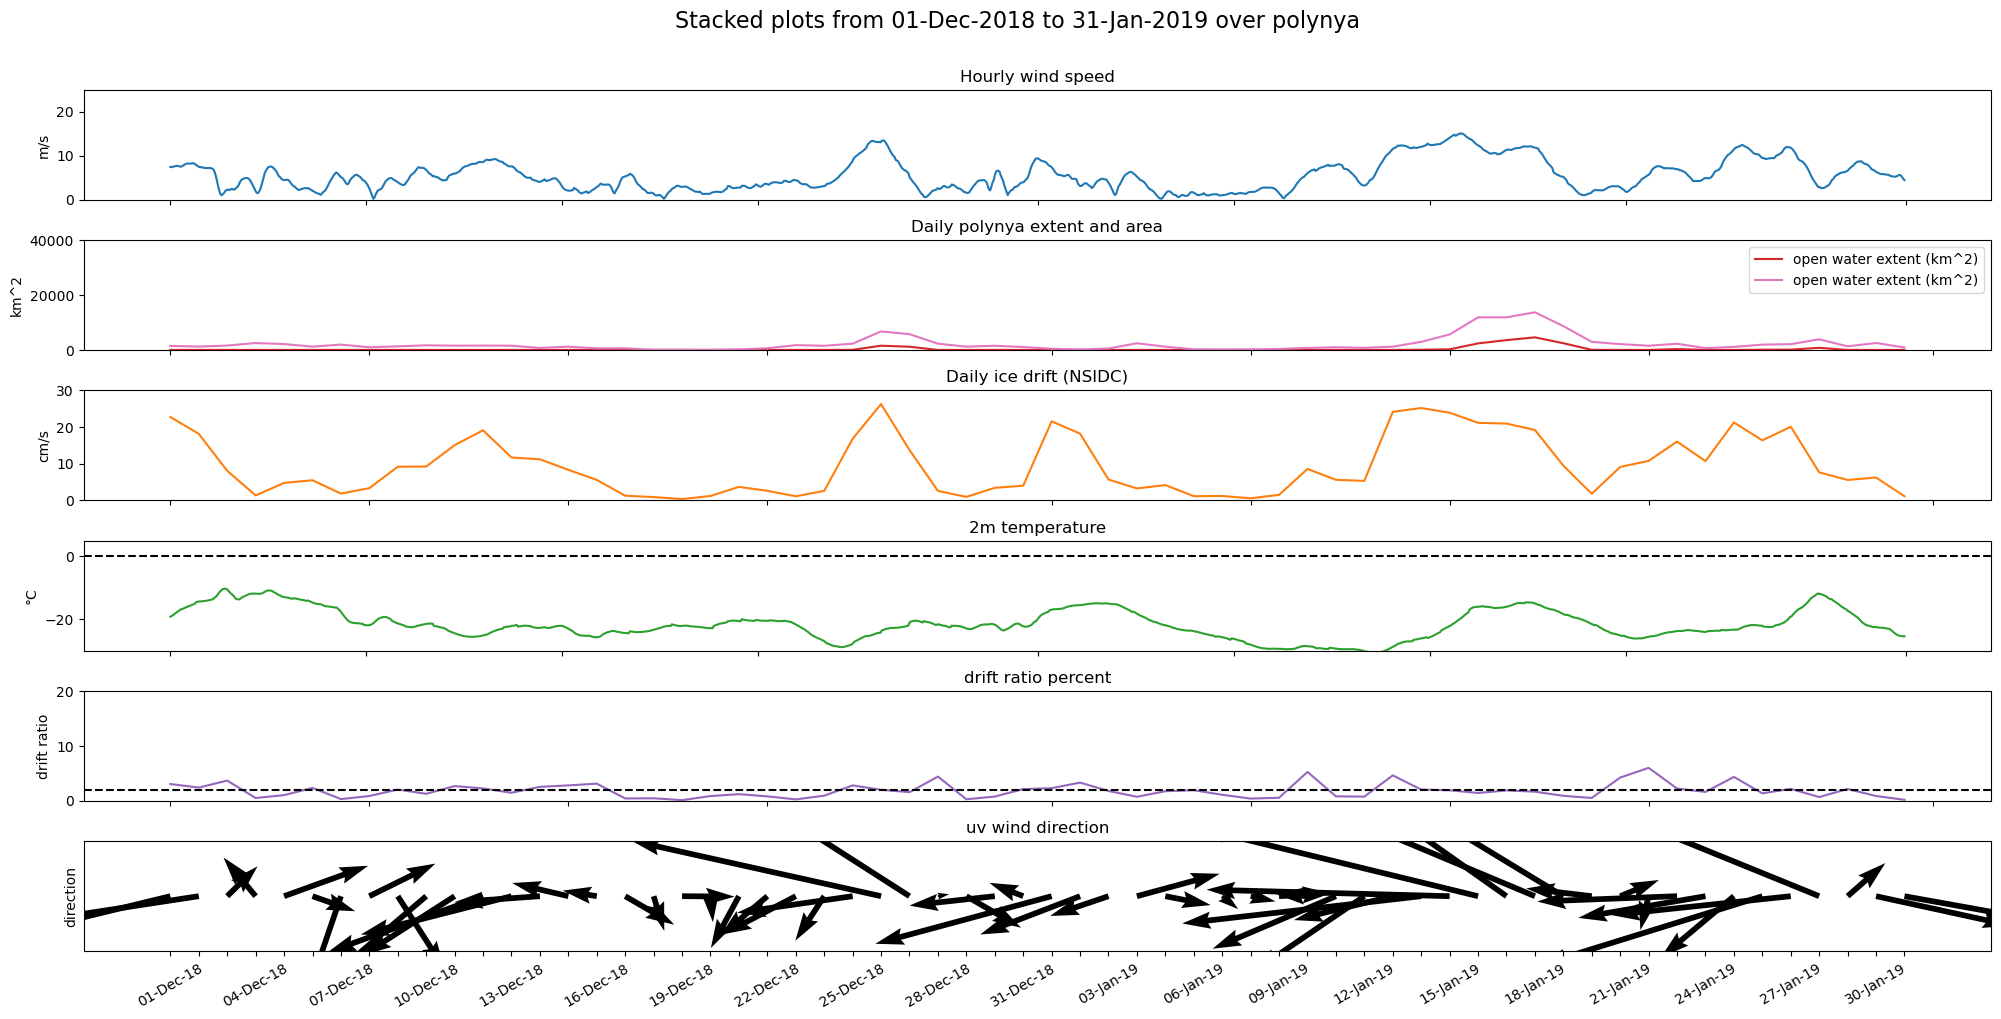

In [97]:
fig, ax = plt.subplots(6, 1, figsize = (20,10))

labeldata = ("m/s", "km^2", "cm/s", "°C", 'drift ratio', "direction")

for i, (unit) in enumerate(labeldata):
    ax[i].set_ylabel(unit)
    # ax[i].axvspan(datetime(2011, 1,3), datetime(2011, 1, 8), facecolor='lightgray', alpha=0.2)
plt.tight_layout()
fig.subplots_adjust(top=.9)

ax[0].plot(time_hourly, df_hourly_wind.uv_wind, 'tab:blue', label='uv wind (m/s)')
ax[0].set_title('Hourly wind speed')
ax[0].set_ylim(0,25)

ax[1].plot(time_daily, df_daily_size.Open_water_extent_km2, 'tab:red', label = 'open water extent (km^2)')
ax[1].plot(time_daily, df_daily_size.Open_water_area_km2, 'tab:pink', label = 'open water extent (km^2)')
ax[1].set_title('Daily polynya extent and area')
ax[1].legend()
ax[1].set_ylim(0,40000)

if year == 2024:
    ax[2].step(time_weekly, df_weekly_drift.weekly_uv_cm_s, 'tab:orange', where = 'post', label = 'NSIDC weekly drift')
    ax[2].set_title('Weekly ice drift (NSIDC)')
    ax[2].plot(time_daily, df_osisaf_drift.osisaf_uv_cm_s, 'xkcd:burnt orange', label = 'OSISAF daily drift')
    ax[2].set_title('Ice drift (NSIDC and OSISAF)')
    ax[2].set_ylim(0,30)
    ax[2].legend()

else:
    ax[2].plot(time_daily, df_daily_drift.daily_uv_cm_s, 'tab:orange', label = 'NSIDC daily drift')
    ax[2].set_title('Daily ice drift (NSIDC)')
    ax[2].set_ylim(0,30)

ax[3].plot(time_hourly, df_hourly_wind.t2m_average_C, 'tab:green', label = "t2m (C)")
ax[3].set_title('2m temperature')
ax[3].set_ylim(-30,5)
ax[3].axhline(0, color = 'black', linestyle = '--')

ax[4].plot(time_daily, drift_ratio*100, 'tab:purple', label = "drift ratio percent")
ax[4].set_title('drift ratio percent')
ax[4].set_ylim(0,20)
ax[4].axhline(2, color = 'black', linestyle = '--')

y = np.zeros_like(time_daily2)
qv = plt.quiver(time_daily, y, df_daily_wind.u10_average_m_s, df_daily_wind.v10_average_m_s, width=0.003)
qk = ax[5].quiverkey(qv, 10, 10, 5, r'$20 \frac{km}{day}$',labelpos='E' )
ax[5].set_title('uv wind direction')
ax[5].set_yticks([])
ax[5].set_xticks(time_daily)
n = 3  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax[5].xaxis.get_ticklabels()) if i % n != 0]

for ax in ax.flat:
    ax.label_outer()

plt.xticks(rotation=30)
# plt.xticks(time_daily)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))

plt.suptitle(f'Stacked plots from {time_daily[0].strftime("%d-%b-%Y")} to {time_daily[len(time_daily) - 1].strftime("%d-%b-%Y")} over polynya', fontsize=16)
#highlighting the polynya formation


In [77]:
df_weekly_drift

,time,weekly_u_cm_s,weekly_v_cm_s,weekly_uv_cm_s
0,2023-12-03,10.272727,4.829546,14.527830
1,2023-12-10,6.143750,9.743182,8.688575
2,2023-12-17,12.893750,3.935227,18.234516
3,2023-12-24,6.377841,3.359091,9.019630
4,2024-01-01,17.352272,3.689773,24.539818
5,2024-01-08,22.360228,1.592045,31.622137
6,2024-01-15,-1.575000,2.133523,2.227386
7,2024-01-22,-3.507386,-1.381250,4.960193
8,2024-01-29,5.444886,5.176137,7.700232


In [20]:
print(len(time_daily))
print(len(y))
print(len(df_daily_wind.u10_average_m_s))
print(len(df_daily_wind.v10_average_m_s))
print(len(df_daily_size.Open_water_extent_km2))

62
62
46
46
62


In [8]:
print(len(time_hourly))

721


In [1]:
## stick plot
#starts an array

fig, ax = plt.subplots(figsize = (20, 5))
qv = plt.quiver(date_list, np.zeros_like(date_list), u10_average, v10_average, width=0.003)
qk = ax.quiverkey(qv, 10, 10, 5, r'$20 \frac{km}{day}$',labelpos='E' )

#why is it not showing up!

# save figure, if desired
# save_path = f'/Users/reu/Desktop/quiver.png'
# fig.savefig(save_path, dpi=300, bbox_inches = 'tight')

#formatting the plot
plt.xticks(rotation=30)
plt.xticks(date_list)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
plt.yticks([])
#labels
plt.xlabel('Date')
#ax.axvspan(datetime(2024, 1, 10), datetime(2024, 1, 15), facecolor='silver', alpha=0.5)

plt.title(f'u-v wind {date_list[0].strftime("%d-%b-%Y")} to {date_list[-1].strftime("%d-%b-%Y")} over polynya')

NameError: name 'plt' is not defined